# TASK 1

# Exploratory Data Analysis on Dataset - Terrorism

As a security/defense analyst, try to find out the hot zone of terrorism.

# IMPORTING THE NECCESARY LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# IMPORTING THE DATASET

In [3]:
df=pd.read_csv('globalterrorismdb_0718dist.csv')

In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.shape

(181691, 135)

In [8]:
df.value_counts

<bound method DataFrame.value_counts of              eventid  iyear  imonth  iday approxdate  extended resolution  \
0       197000000001   1970       7     2        NaN         0        NaN   
1       197000000002   1970       0     0        NaN         0        NaN   
2       197001000001   1970       1     0        NaN         0        NaN   
3       197001000002   1970       1     0        NaN         0        NaN   
4       197001000003   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country         country_txt

In [9]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [10]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

# COLLECTING THE REQUIRED COLUMNS FOR EXPLORATORY ANALYSIS

In [12]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','extended':'Extended','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'Latitude','longitude':'Longitude','attacktype1_txt':'AttackType','nkill':'Killed','nwound':'Wounded','summary':'Summary','target1':'Target'},inplace=True)

In [13]:
df=df[['Year','Month','Day','Extended','Country','Region','State','City','Latitude','Longitude','AttackType','Killed','Wounded','Summary','Target']]

In [14]:
df.describe()

,Year,Month,Day,Extended,Latitude,Longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,0.045346,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,0.208063,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,0.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [15]:
df.head()

,Year,Month,Day,Extended,Country,Region,State,City,Latitude,Longitude,AttackType,Killed,Wounded,Summary,Target
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,NaN,Julio Guzman
1,1970,0,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,NaN,"Nadine Chaval, daughter"
2,1970,1,0,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,1.0,0.0,NaN,Employee
3,1970,1,0,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,NaN,U.S. Embassy
4,1970,1,0,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,NaN,U.S. Consulate


In [16]:
df.tail()

,Year,Month,Day,Extended,Country,Region,State,City,Latitude,Longitude,AttackType,Killed,Wounded,Summary,Target
181686,2017,12,31,0,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,12/31/2017: Assailants opened fire on a Somali...,Checkpoint
181687,2017,12,31,0,Syria,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,12/31/2017: Assailants launched mortars at the...,Hmeymim Air Base
181688,2017,12,31,0,Philippines,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,12/31/2017: Assailants set fire to houses in K...,Houses
181689,2017,12,31,0,India,South Asia,Manipur,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,12/31/2017: Assailants threw a grenade at a Fo...,Office
181690,2017,12,31,0,Philippines,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,Bombing/Explosion,0.0,0.0,12/31/2017: An explosive device was discovered...,Unknown


In [17]:
print("Country with most terrorist attacks:", df.Country.value_counts().idxmax())
print("Region with most terrorist attacks:", df.Region.value_counts().idxmax())
print("State with most terrorist attacks:", df.State.value_counts().idxmax())
print("City with most terrorist attacks:", df.City.value_counts().idxmax())

Country with most terrorist attacks: Iraq
Region with most terrorist attacks: Middle East & North Africa
State with most terrorist attacks: Baghdad
City with most terrorist attacks: Unknown


In [18]:
feature_corr=df.corr()
print(feature_corr)

               Year     Month       Day  Extended  Latitude  Longitude  \
Year       1.000000  0.000139  0.018254  0.091754  0.166933   0.003917   
Month      0.000139  1.000000  0.005497 -0.000468 -0.015978  -0.003880   
Day        0.018254  0.005497  1.000000 -0.004700  0.003423  -0.002285   
Extended   0.091754 -0.000468 -0.004700  1.000000 -0.024749   0.000523   
Latitude   0.166933 -0.015978  0.003423 -0.024749  1.000000   0.001463   
Longitude  0.003917 -0.003880 -0.002285  0.000523  0.001463   1.000000   
Killed     0.015341  0.003463 -0.003693  0.027737 -0.018124  -0.000562   
Wounded    0.015273  0.002938 -0.001268 -0.006627  0.015988   0.000223   

             Killed   Wounded  
Year       0.015341  0.015273  
Month      0.003463  0.002938  
Day       -0.003693 -0.001268  
Extended   0.027737 -0.006627  
Latitude  -0.018124  0.015988  
Longitude -0.000562  0.000223  
Killed     1.000000  0.534375  
Wounded    0.534375  1.000000  


# DATA VISUALIZATION

# NO. OF TERRORIST ACTIVITIES IN EACH YEAR

# BARPLOT

Text(0.5, 1.0, 'No. of terrorist activities every year')

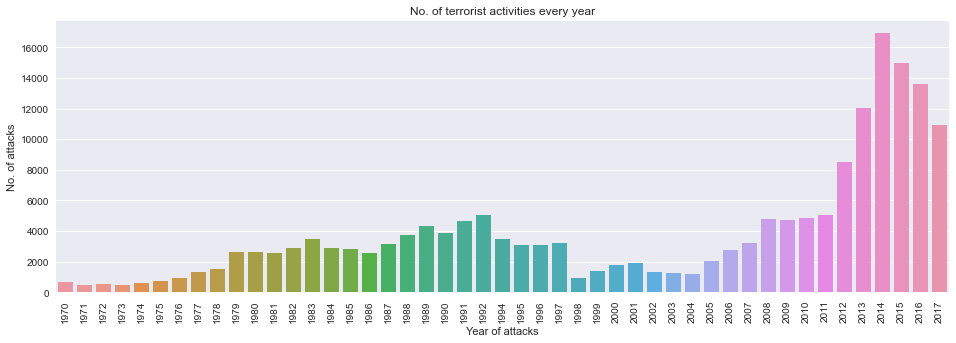

In [27]:
plt.style.use('seaborn')
plt.subplots(figsize=(16,5))
plt.xticks(rotation=90)
x_years=df['Year'].unique()
y_counts=df['Year'].value_counts(dropna=False).sort_index()
sns.barplot(x=x_years,y=y_counts)
plt.xlabel('Year of attacks')
plt.ylabel('No. of attacks')
plt.title('No. of terrorist activities every year')

 Year <b> 2014 </b> has the most number of terrorist attacks.

# BOXPLOT

<AxesSubplot:xlabel='Year'>

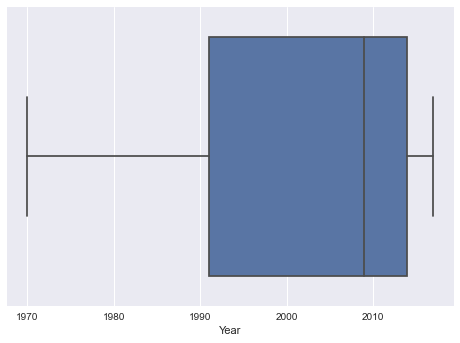

In [20]:
sns.boxplot(x=df['Year'])

# VIOLIN PLOT

<AxesSubplot:xlabel='Year'>

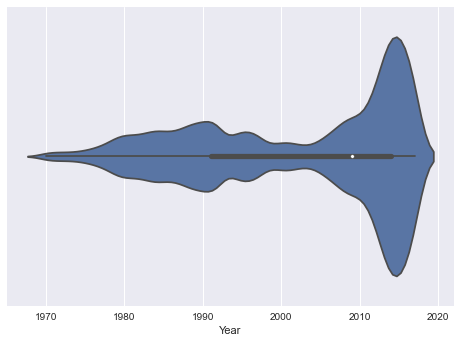

In [21]:
sns.violinplot(x=df['Year'])

# HISTOGRAM

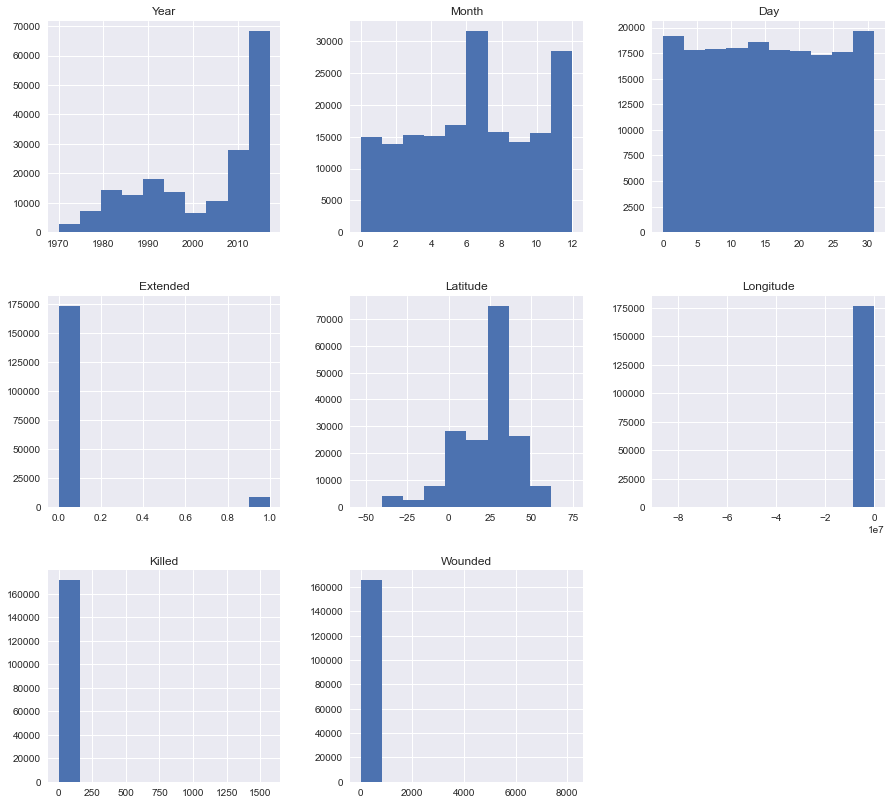

In [30]:
df.hist(figsize=(15,14))
plt.show()

# TERRORIST ACTIVITIES BY COUNTRY

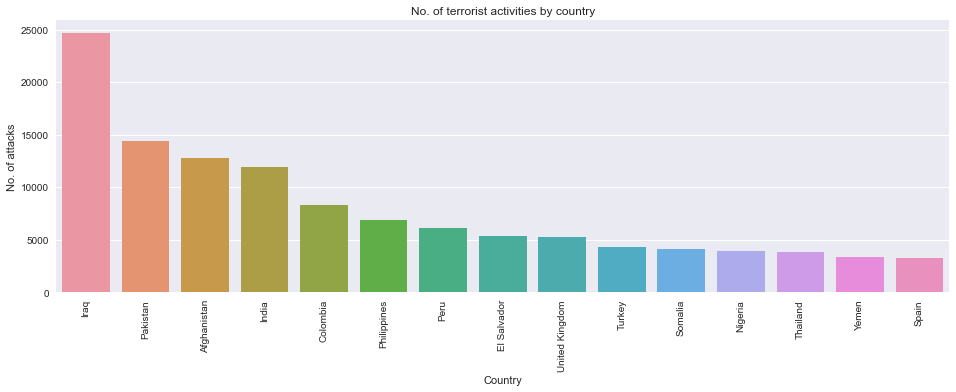

In [28]:
plt.style.use('seaborn')
plt.subplots(figsize=(16,5))
plt.xticks(rotation=90)
sns.barplot(x=df['Country'].value_counts()[:15].index,y=df['Country'].value_counts()[:15].values)
plt.xlabel('Country')
plt.ylabel('No. of attacks')
plt.title('No. of terrorist activities by country')
plt.show()

<b> Iraq </b> is the country with most terrorist attacks.

# TERRORIST ACTIVITIES BY REGIONS

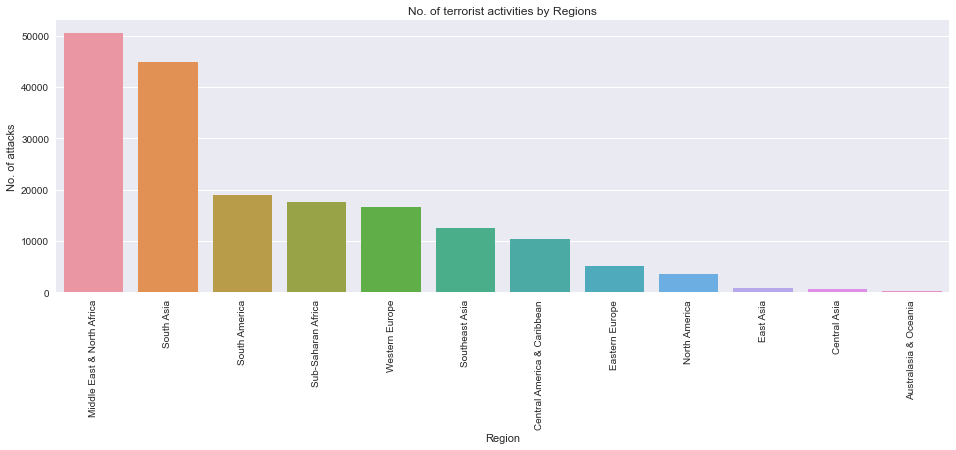

In [31]:
plt.style.use('seaborn')
plt.subplots(figsize=(16,5))
plt.xticks(rotation=90)
sns.barplot(x=df['Region'].value_counts()[:15].index,y=df['Region'].value_counts()[:15].values)
plt.xlabel('Region')
plt.ylabel('No. of attacks')
plt.title('No. of terrorist activities by Regions')
plt.show()

<b> North Africa & Middle East </b> is the region with most terrorist attacks.

# NUMBER OF DEATHS IN EACH YEAR

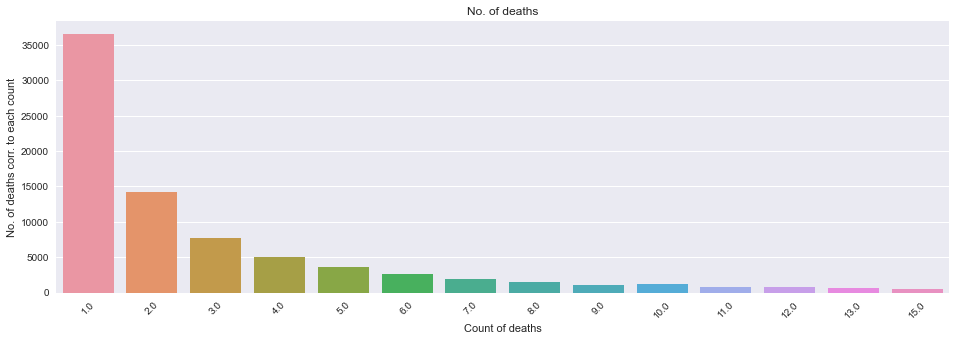

In [32]:
plt.style.use('seaborn')
plt.subplots(figsize=(16,5))
plt.xticks(rotation=45)
sns.barplot(x=df['Killed'].value_counts()[1:15].index,y=df['Killed'].value_counts()[1:15].values)
plt.xlabel('Count of deaths')
plt.ylabel('No. of deaths corr. to each count')
plt.title('No. of deaths')
plt.show()

# NUMBER OF INJURIES IN EACH YEAR

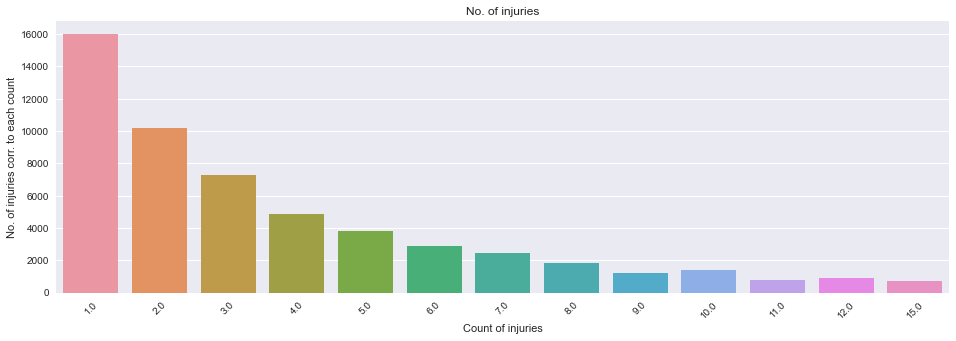

In [33]:
plt.style.use('seaborn')
plt.subplots(figsize=(16,5))
plt.xticks(rotation=45)
sns.barplot(x=df['Wounded'].value_counts()[1:15].index,y=df['Wounded'].value_counts()[1:15].values)
plt.xlabel('Count of injuries')
plt.ylabel('No. of injuries corr. to each count')
plt.title('No. of injuries')
plt.show()

# TYPES OF TERRORIST ATTACKS

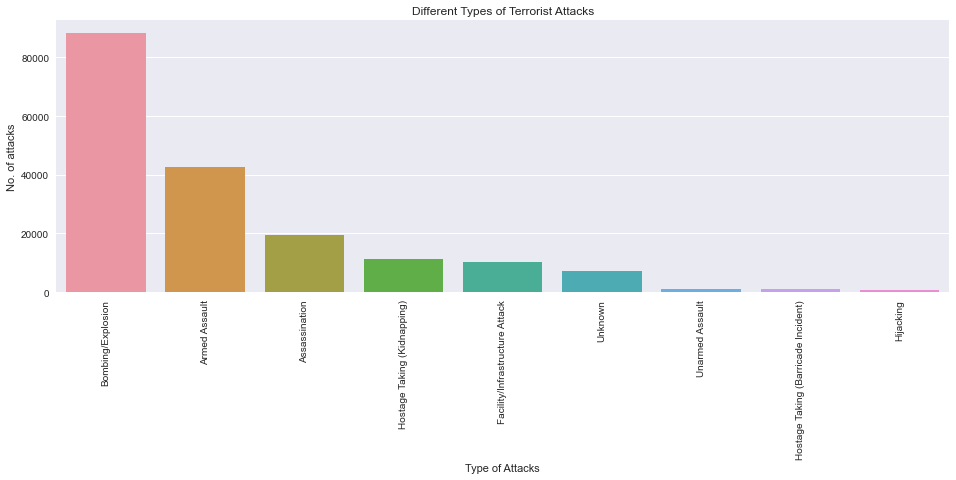

In [37]:
plt.style.use('seaborn')
plt.subplots(figsize=(16,5))
plt.xticks(rotation=90)
sns.barplot(x=df['AttackType'].value_counts().index,y=df['AttackType'].value_counts().values)
plt.xlabel('Type of Attacks')
plt.ylabel('No. of attacks')
plt.title('Different Types of Terrorist Attacks')
plt.show()

Most of the terrorist attacks were done with <b> Bombing/Explosion </b>.

# TARGET OF TERRORIST ATTACKS

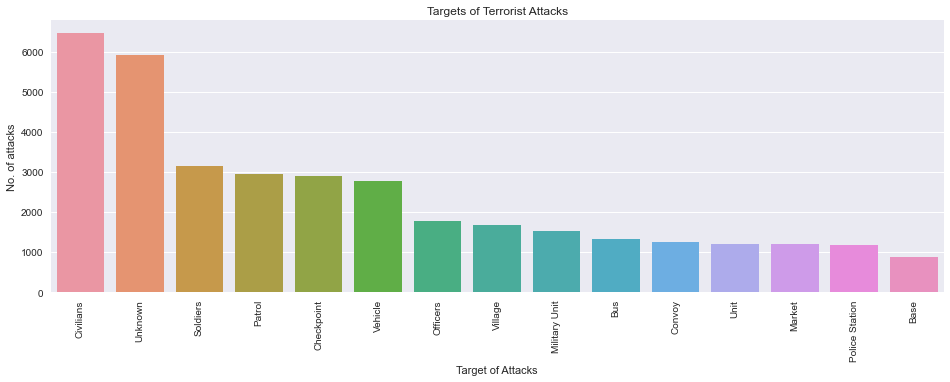

In [39]:
plt.style.use('seaborn')
plt.subplots(figsize=(16,5))
plt.xticks(rotation=90)
sns.barplot(x=df['Target'].value_counts()[:15].index,y=df['Target'].value_counts()[:15].values)
plt.xlabel('Target of Attacks')
plt.ylabel('No. of attacks')
plt.title('Targets of Terrorist Attacks')
plt.show()

<b> Civilians </b> were the highest targets of terrorist attacks.

# CONCLUSION

Country with most terrorist attacks         :   Iraq

Region with most terrorist attacks          :   Middle East & North Africa

State with most terrorist attacks           :   Baghdad

Most type of the terrorist attacks          :   Bombing/Explosion

Year with most terrorist attacks            :   2014

Most of the targets of terrorist attacks    :   Civilians